In [19]:
import gdal 
import random
from os import sep, listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np 
from scipy import ndimage
import skimage.transform as tr
import spectral as sp
import shapefile
import pandas as pd
gdal.UseExceptions()



In [30]:
DATASET_PATH = 'ECODSEdataset' + sep + 'ECODSEdataset'+ sep + 'RSdata'+ sep 
RGB_FOLDER_PATH = DATASET_PATH + 'camera' + sep
rgb_files = sorted([rgb_file for rgb_file in 
             [f for f in listdir(RGB_FOLDER_PATH) if isfile(join(RGB_FOLDER_PATH, f))] 
             if 'tif' in rgb_file and 'aux.xml' not in rgb_file])
# rgb_files
LIDAR_FOLDER_PATH = DATASET_PATH + 'chm' + sep
lidar_files = sorted([lidar_file for lidar_file in 
             [f for f in listdir(LIDAR_FOLDER_PATH) if isfile(join(LIDAR_FOLDER_PATH, f))] 
             if 'tif' in lidar_file and 'aux.xml' not in lidar_file])
HYPER_FOLDER_PATH = DATASET_PATH + 'hs' + sep
hyper_files = sorted([hyper_file for hyper_file in 
             [f for f in listdir(HYPER_FOLDER_PATH) if isfile(join(HYPER_FOLDER_PATH, f))] 
             if 'tif' in hyper_file and 'aux.xml' not in hyper_file])
print ('rgb_files=%d'% len(rgb_files))
print ('lidar_files=%d' % len(lidar_files))
print ('hyper_files=%d' % len(hyper_files))#, lidar_files, hyper_files)

rgb_files=37
lidar_files=43
hyper_files=43


In [31]:
n = 3
# print(len(rgb_files),len(lidar_files), len(hyper_image))
rgb_image = gdal.Open(RGB_FOLDER_PATH + rgb_files[n]).ReadAsArray().T
lidar_image = gdal.Open(LIDAR_FOLDER_PATH + lidar_files[n]).ReadAsArray().T
hyper_image = gdal.Open(HYPER_FOLDER_PATH + hyper_files[n]).ReadAsArray().T
rgb_image /= rgb_image.max()

# Avoid Normalizing without collating the pointCloud Data

# lidar_image /= lidar_image.max() 

# hyper_image /= hyper_image.max()

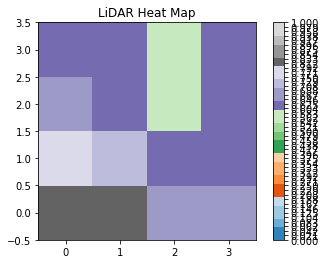

In [12]:
lidar_image[48:52,38:42]
cmap = cm.get_cmap('tab20c', 50)
plt.imshow(lidar_image[48:52,38:42], cmap=cmap, vmin=0, vmax=1, origin='lower')
plt.title("LiDAR Heat Map")
plt.colorbar(ticks=np.linspace(0,1,49))
plt.show()

In [ ]:
lidar_image[40:45].shape

ImageView object:
  Display bands       :  (80, 80, 420)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.016735564741965595, 0.23403120416055473]
    G: [0.016735564741965595, 0.23403120416055473]
    B: [0.046139485264701956, 0.27276970262701694]

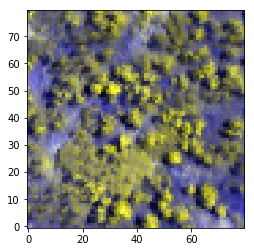

In [13]:
# print (rgb_image.shape, lidar_image.shape, hyper_image.shape)
sp.imshow(hyper_image, (80,80,420), origin="lower")
# sp.save_rgb('simple.png', hyper_image, [80,80,420])


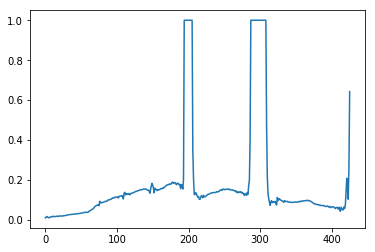

In [17]:
y = [x for x in range(426)]
plt.plot(y,hyper_image[50][40]) 
# Red Edge - End of the visible spectrum 
# Near Infrared - Plants and water are super white 
# Red for crown segmentation 
# lookout for noise in the first three or four bands 
# MNF, Hierarchical Image Reduction 
# Merge Bands with low KL Divergence Distance - Matlab Algorithm save as mat and read into here 
# Put images into mat files and use matlab to have better insights into data 

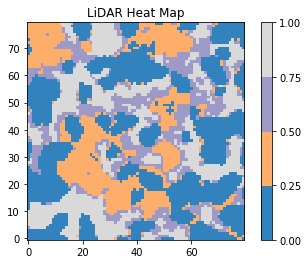

In [14]:
cmap = cm.get_cmap('tab20c', 4)
plt.imshow(lidar_image, cmap=cmap, vmin=0, vmax=1, origin='lower')
plt.title("LiDAR Heat Map")
plt.colorbar(ticks=np.linspace(0,1,5))
plt.show()

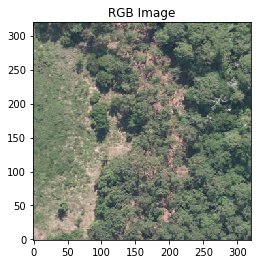

In [15]:
# RGB Image Bands Viewer 
plt.imshow(rgb_image, origin='lower')
plt.title("RGB Image")
# plt.imsave('RGB.png')
plt.show()

/home/vagrant/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


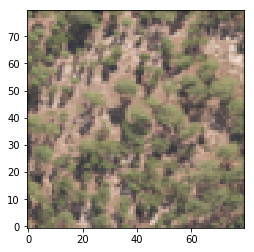

In [38]:
# plt.imsave('out.png',img_array.T/img_array.max(), origin='lower')
plt.imshow(tr.rescale(rgb_image, (1/ 4, 1/ 4),
                       anti_aliasing=True, multichannel=True),origin="lower")

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


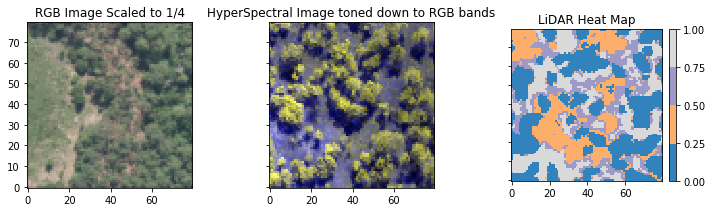

In [16]:
cmap = cm.get_cmap('tab20c', 4)
# plt.imshow(lidar_image, cmap=cmap, vmin=0, vmax=1, origin='lower')
# plt.title("LiDAR Heat Map")
# plt.colorbar(ticks=np.linspace(0,1,5))
f, axes = plt.subplots(1,3,sharey=True, figsize=(10,10))
# f.suptitle('Input Image Types')
axes[0].imshow(tr.rescale(rgb_image, (1/4,1/4), anti_aliasing=True, multichannel=True), origin="lower")
axes[0].set_title('RGB Image Scaled to 1/4')
axes[1].imshow(plt.imread('simple.png'),origin="lower")
axes[1].set_title('HyperSpectral Image toned down to RGB bands')
lidar_map = axes[2].imshow(lidar_image,cmap=cmap, vmin=0, vmax=1, origin='lower')
axes[2].set_title('LiDAR Heat Map')
f.colorbar(lidar_map,ax=axes[2],ticks=np.linspace(0,1,5),fraction=0.046, pad=0.04)
f.tight_layout()
f.savefig('sample_image.png')



## Printing Shapefile

Initializing Display
Display Initialized


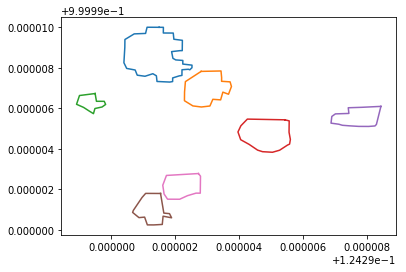

In [17]:
sf = shapefile.Reader("ITC_OSBS_003.shp")

print("Initializing Display")
fig = plt.figure()
ax = fig.add_subplot(111)
# plt.xlim([76, 85])
# plt.ylim([12, 21])
print("Display Initialized")
max_norm = float('-inf')
for shape in sf.shapes(): 
    x = np.array([i[0] for i in shape.points[:]])
    y = np.array([i[1] for i in shape.points[:]])
    max_norm = max(max_norm, x.max(), y.max())
for shape in sf.shapes():
    x = np.array([i[0] for i in shape.points[:]])
    # x /= 3285346.226354544
    x /= max_norm
    y = np.array([i[1] for i in shape.points[:]])
    y /= max_norm
#     print(x,y)
    plt.plot(x,y)
plt.show()

### Doing PointCloud Stuff 

In [20]:
pc = pd.read_csv('ptcloud_OSBS_003.csv')

In [21]:
pc

,X,Y,Z
0,408303.40,3285324.40,50.56
1,408304.10,3285324.37,50.29
2,408304.72,3285324.34,48.98
3,408305.40,3285324.31,48.55
4,408306.09,3285324.28,48.21
5,408305.01,3285324.38,32.37
6,408305.72,3285324.35,32.23
7,408307.37,3285324.23,45.90
8,408308.10,3285324.20,46.06
9,408321.08,3285324.19,39.61


In [26]:
lidar_image.shape

(80, 80)

In [27]:
hyper_image.shape

(80, 80, 426)

array([ 0.0141,  0.0213,  0.029 ,  0.0231,  0.0165,  0.0187,  0.0192,
        0.0232,  0.0271,  0.0312,  0.0323,  0.0332,  0.0357,  0.0364,
        0.036 ,  0.0376,  0.0395,  0.039 ,  0.0389,  0.0407,  0.0415,
        0.0407,  0.0413,  0.0414,  0.0426,  0.0437,  0.0474,  0.0479,
        0.0479,  0.0512,  0.0535,  0.0552,  0.0575,  0.0576,  0.0598,
        0.0647,  0.0639,  0.0653,  0.0679,  0.0713,  0.0718,  0.0731,
        0.0766,  0.0759,  0.0784,  0.0808,  0.084 ,  0.0877,  0.087 ,
        0.0888,  0.0907,  0.0931,  0.0963,  0.098 ,  0.0989,  0.1021,
        0.1012,  0.1014,  0.1027,  0.1031,  0.1067,  0.1107,  0.1149,
        0.1172,  0.122 ,  0.1268,  0.1276,  0.1285,  0.1353,  0.1384,
        0.1426,  0.1443,  0.1464,  0.1495,  0.1509,  0.14  ,  0.166 ,
        0.165 ,  0.1616,  0.1648,  0.1663,  0.1676,  0.1703,  0.1707,
        0.1734,  0.1712,  0.1707,  0.1768,  0.1803,  0.1802,  0.1824,
        0.184 ,  0.1852,  0.1885,  0.1933,  0.1916,  0.193 ,  0.198 ,
        0.1938,  0.1